In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
import numpy as np

In [61]:
os.listdir('data')

['train', 'test', 'validation']

In [57]:
classes = os.listdir('data/train')
classes

['a03', 'a06', 'a05', 'a02', 'a01', 'a04']

In [ ]:
n_features = 9
n_classes = 6

In [58]:
ts = pd.read_csv('data/train/a01/554.csv', index_col=0)
ts.shape

In [81]:
std_res = np.zeros((n_classes, n_features))
mean_res = np.zeros((n_classes, n_features))

100%|██████████| 277/277 [00:01<00:00, 276.29it/s]


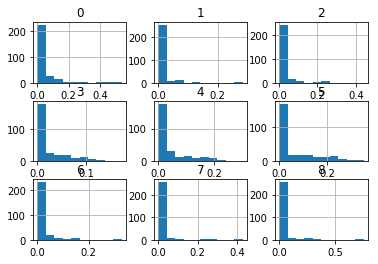

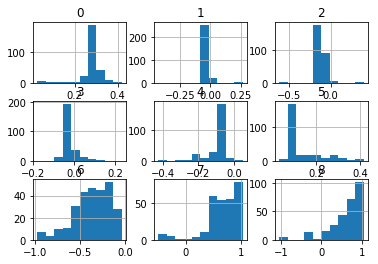

100%|██████████| 187/187 [00:00<00:00, 275.86it/s]


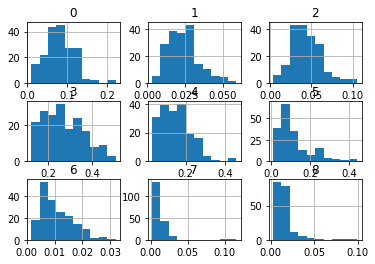

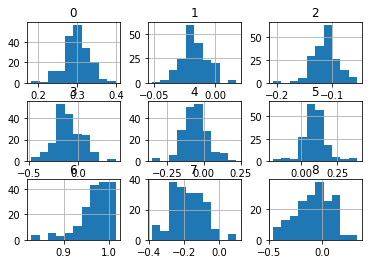

100%|██████████| 289/289 [00:01<00:00, 265.65it/s]


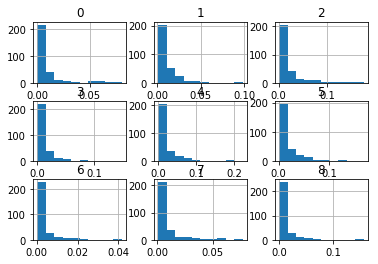

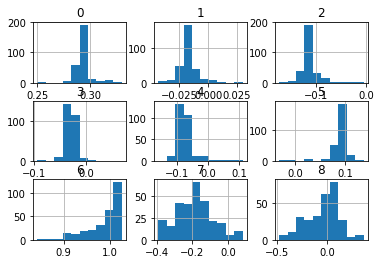

100%|██████████| 264/264 [00:00<00:00, 290.67it/s]


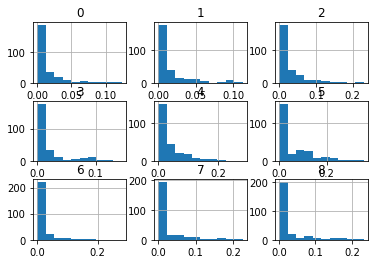

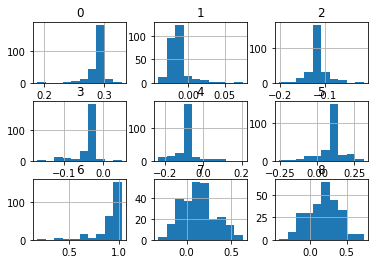

100%|██████████| 220/220 [00:00<00:00, 223.63it/s]


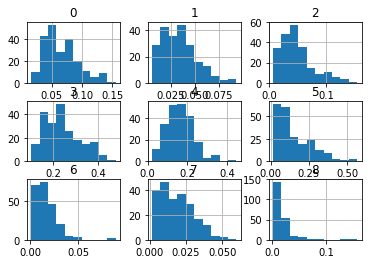

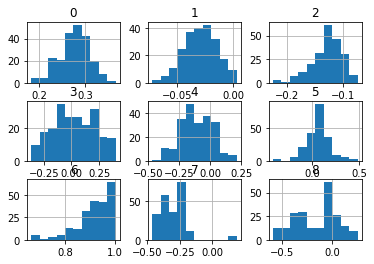

100%|██████████| 219/219 [00:00<00:00, 222.51it/s]


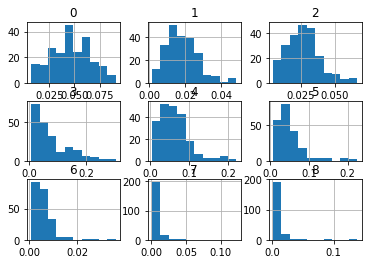

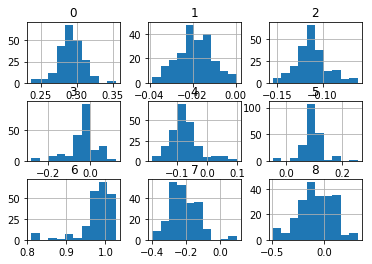

In [90]:
i = 0
for cl in sorted(classes):
    j = 0
    files = os.listdir('data/train/' + cl)
    #print i, len(files)
    std_res = np.zeros((len(files), n_features))
    mean_res = np.zeros((len(files), n_features))
    for f in tqdm(files):
        fn = 'data/train/' + f
        ts = pd.read_csv('data/train/{}/{}'.format(cl, f), index_col=0)
        ts = ts.as_matrix()
        std_res[j, :] = ts.std(axis = 0)
        mean_res[j, :] = ts.mean(axis = 0)
        #print j, fn
        j += 1
    pd.DataFrame(std_res).hist()
    plt.show()
    pd.DataFrame(mean_res).hist()
    plt.show()
    std_res /= len(files)
    mean_res /= len(files)
    i += 1
    #break

In [ ]:
files = os.listdir('data/test/')
std_res = np.zeros((len(files), n_features))
mean_res = np.zeros((len(files), n_features))
for f in tqdm(files):
    fn = 'data/train/' + f
    ts = pd.read_csv('data/train/{}/{}'.format(cl, f), index_col=0)
    ts = ts.as_matrix()
    std_res[j, :] = ts.std(axis = 0)
    mean_res[j, :] = ts.mean(axis = 0)
    #print j, fn
    j += 1
pd.DataFrame(std_res).hist()
plt.show()
pd.DataFrame(mean_res).hist()
plt.show()
std_res /= len(files)
mean_res /= len(files)
i += 1